Convex Hull Area for all initial and final points: 0.22138684168803205


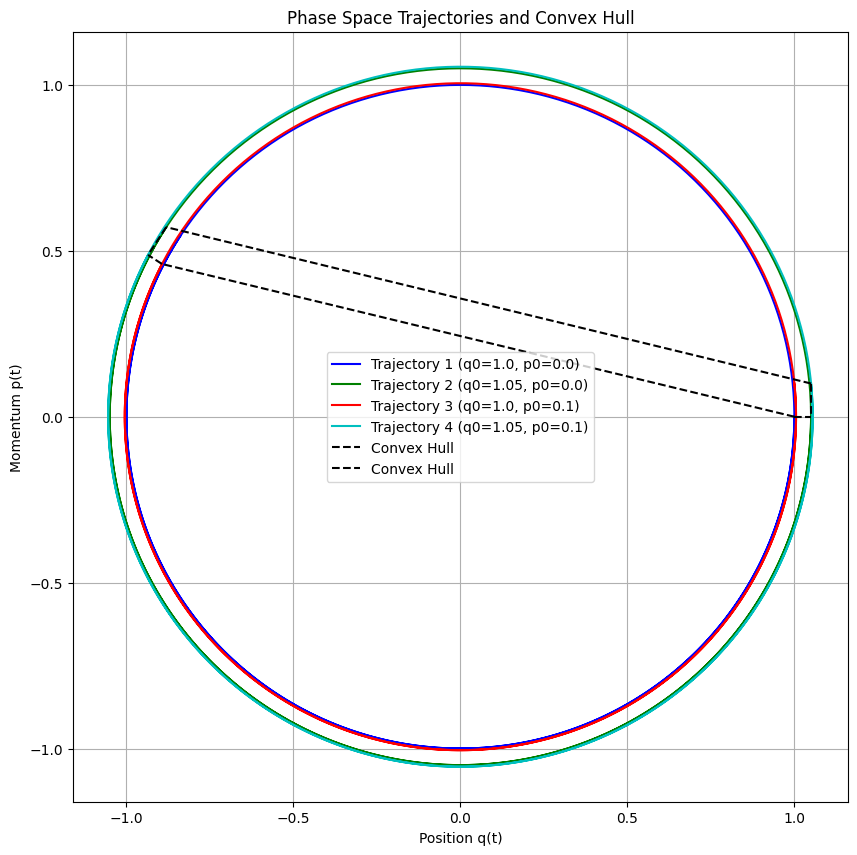

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


def harmonic_oscillator_energy(q, p, k, m):
    """Compute the total energy of the harmonic oscillator."""
    K = p**2 / (2 * m)  # Kinetic energy
    U = 0.5 * k * q**2  # Potential energy
    return K + U


def velocity_verlet_energy_conserving(q0, p0, k, m, dt, n_steps):
    """
    Energy-conserving integrator for a harmonic oscillator with non-unit Jacobian determinant.

    Parameters:
        q0 (float): Initial position.
        p0 (float): Initial momentum.
        k (float): Spring constant.
        m (float): Mass of the particle.
        dt (float): Time step.
        n_steps (int): Number of integration steps.

    Returns:
        qs (list): Positions at each time step.
        ps (list): Momenta at each time step.
        energies (list): Energies at each time step.
    """
    # Initialize variables
    q = q0
    p = p0
    E0 = harmonic_oscillator_energy(q, p, k, m)

    qs = [q]
    ps = [p]
    energies = [E0]

    for _ in range(n_steps):
        # Half-step momentum update
        f = -k * q  # Force
        p += 0.5 * f * dt

        # Position update
        q += p / m * dt

        # Full-step momentum update
        f = -k * q  # Update force
        p += 0.5 * f * dt

        # Energy correction
        E1 = harmonic_oscillator_energy(q, p, k, m)
        if E1 != E0:
            scale_factor = np.sqrt((E0 - 0.5 * k * q**2) / (0.5 * p**2 / m))
            p *= scale_factor

        # Record values
        qs.append(q)
        ps.append(p)
        energies.append(harmonic_oscillator_energy(q, p, k, m))

    return qs, ps, energies


# Parameters
initial_conditions = [
    (1.0, 0.0),  # Initial condition 1
    (1.05, 0.0),  # Initial condition 2
    (1.0, 0.1),  # Initial condition 3
    (1.05, 0.1),  # Initial condition 4
]
k = 1.0  # Spring constant
m = 1.0  # Mass of the particle
dt = 0.01  # Time step
n_steps = 1000  # Number of steps

# Collect all initial and final points in phase space
phase_space_points = []
for idx, (q0, p0) in enumerate(initial_conditions):
    qs, ps, _ = velocity_verlet_energy_conserving(q0, p0, k, m, dt, n_steps)

    # Collect initial and final points
    phase_space_points.append([qs[0], ps[0]])  # Initial point
    phase_space_points.append([qs[-1], ps[-1]])  # Final point

phase_space_points = np.array(phase_space_points)

# Calculate the convex hull area based on these points
hull = ConvexHull(phase_space_points)
hull_area = hull.volume  # Convex hull area (2D)

# Print convex hull area
print(f"Convex Hull Area for all initial and final points: {hull_area}")

# Plot phase space trajectories and convex hull
plt.figure(figsize=(10, 10))
colors = ["b", "g", "r", "c"]
for idx, (q0, p0) in enumerate(initial_conditions):
    qs, ps, _ = velocity_verlet_energy_conserving(q0, p0, k, m, dt, n_steps)
    plt.plot(
        qs, ps, label=f"Trajectory {idx + 1} (q0={q0}, p0={p0})", color=colors[idx]
    )

# Plot the convex hull
for simplex in hull.simplices:
    plt.plot(
        phase_space_points[simplex, 0],
        phase_space_points[simplex, 1],
        "k--",
        label="Convex Hull" if simplex[0] == 0 else "",
    )

plt.xlabel("Position q(t)")
plt.ylabel("Momentum p(t)")
plt.title("Phase Space Trajectories and Convex Hull")
plt.legend()
plt.grid()
plt.show()